### Linear Regression Model : A Detailed Exploration

#### Introduction
Linear Regression is a fundamental supervised learning algorithms used for predicting continuous variables. It models the relationship between dependent and independent varaibles by fitting a linear equation. 

#### In this notebook, we explore:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Correlation Analysis
- Feature Selection
- Normalization
- Regularization
- Overfitting & Underfitting
- Model Evaluation
- Dimensionality Reduction using PCA

#### Dataset: House Prices Prediction: **Ames Housing dataset**

### Step 1: Importing Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, f_classif, chi2, SelectKBest
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

### Step 2: Download and Load data using Kaggle API

In [2]:

os.environ['KAGGLE_USERNAME'] = "niranjanappaji"
os.environ["KAGGLE_KEY"] = "f969ecf53c07caf0b0ee95cf11175917"

!kaggle datasets download -d prevek18/ames-housing-dataset --unzip

df = pd.read_csv("AmesHousing.csv")
print(df.shape)
df.head()

Dataset URL: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
License(s): unknown
100%|█████████████████████████████████████████| 185k/185k [00:00<00:00, 459kB/s]
100%|█████████████████████████████████████████| 185k/185k [00:00<00:00, 458kB/s]
(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Step 3: Ecploratory Data Analysis (EDA)

In [3]:
### Checking for missing values

df.isnull().sum().sort_values(ascending=False).head(10)


Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
dtype: int64

In [4]:
### Descriptive statistics

df.describe()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

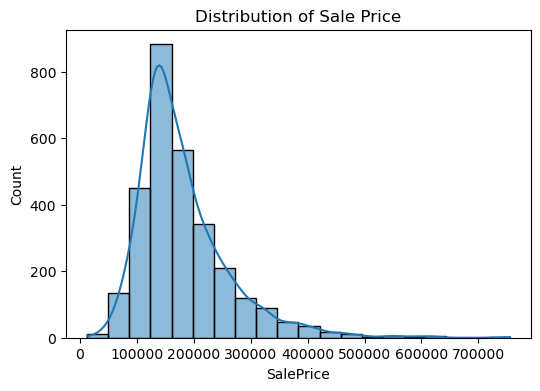

In [6]:
# Visualize the target variable

plt.figure(figsize=(6, 4))
sns.histplot(df['SalePrice'], bins=20, kde = True)
plt.title('Distribution of Sale Price')
plt.show()


**Inference:** Target Variable SalePrice is skewed, applying log transformation may improve the model performance

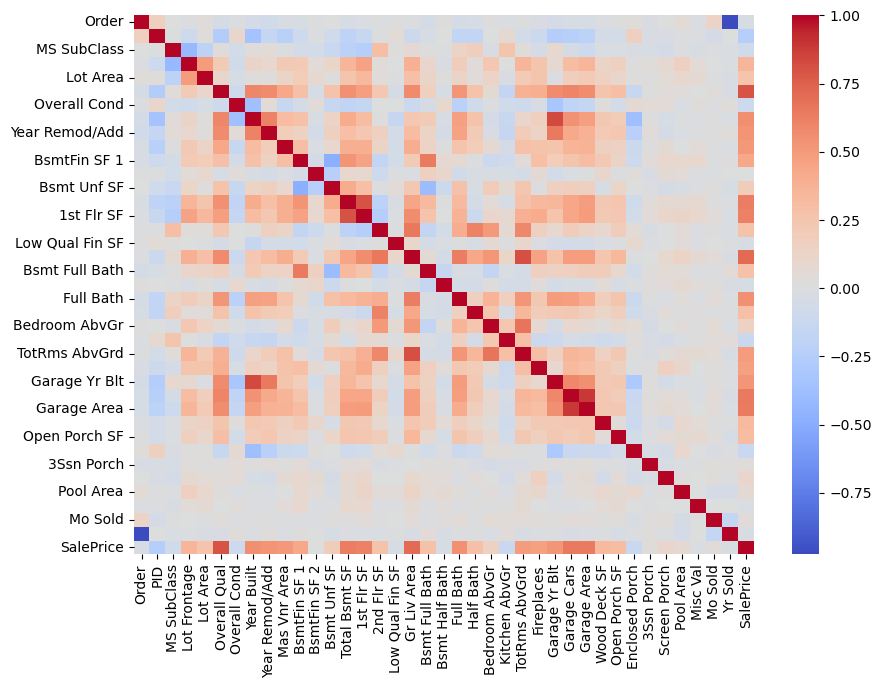

In [7]:
### Correlation heatmap

plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm", annot=False)
plt.show()


In [8]:

numeric_cols = df.select_dtypes(include="number").columns
corr_matrix = df[numeric_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False).head(10)


SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64

**Inference:** Features like OverallQual, GrLivArea, TotalBsmtSF, and GarageCars have strong correlation with SalePrice.

['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area']


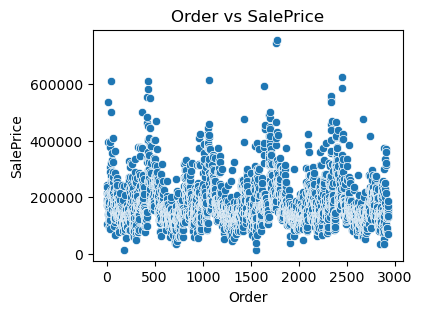

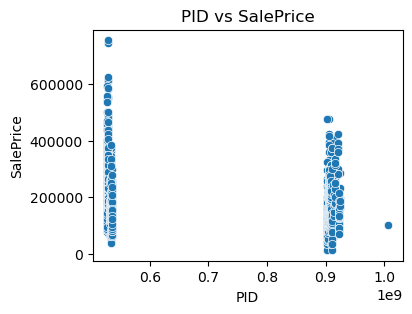

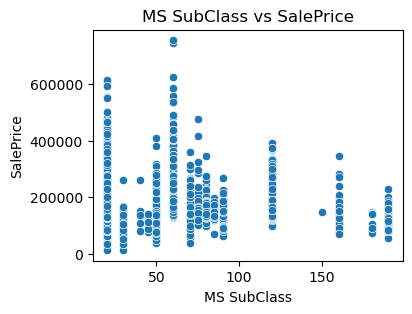

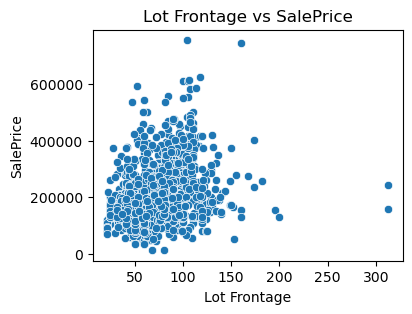

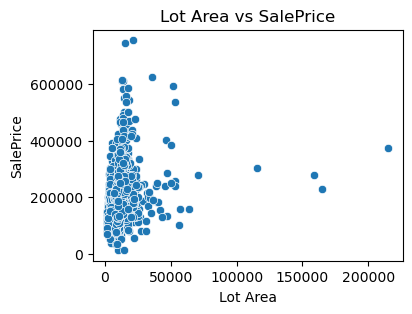

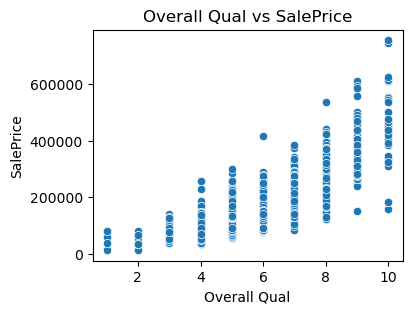

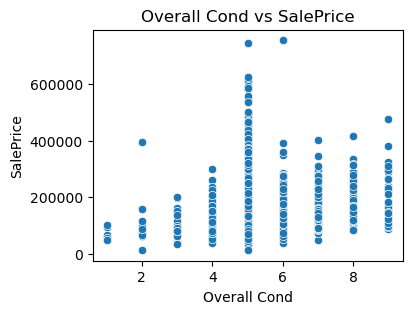

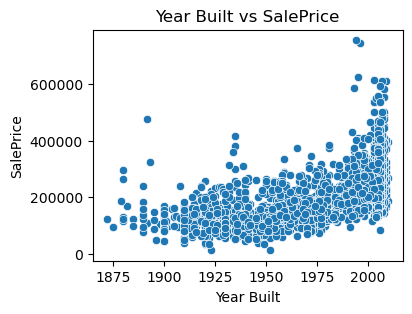

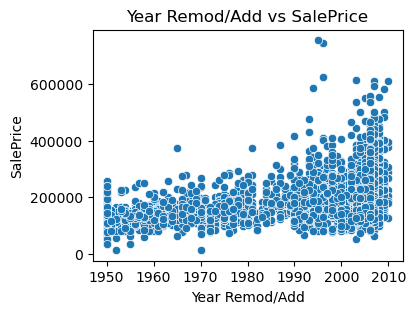

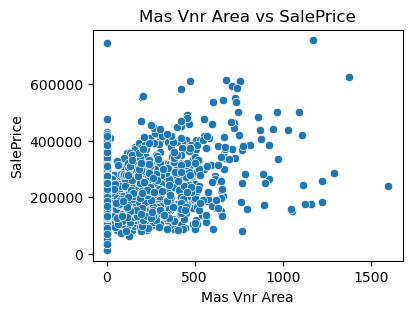

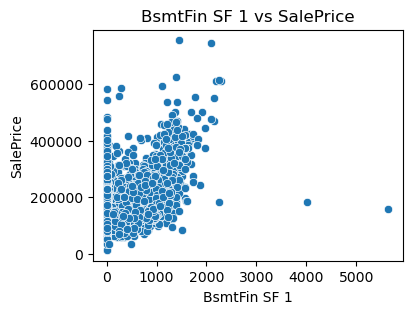

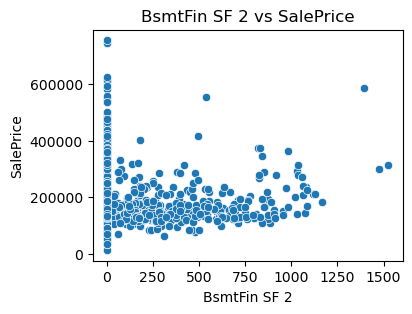

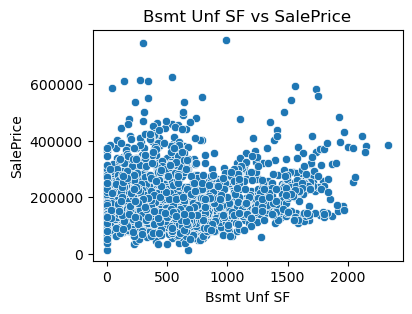

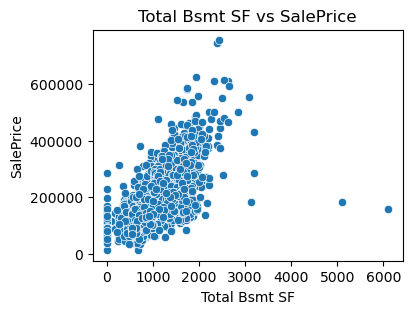

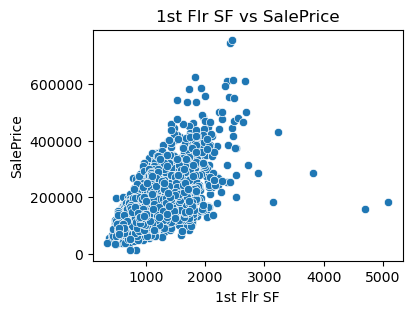

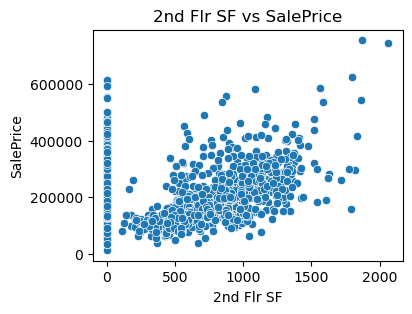

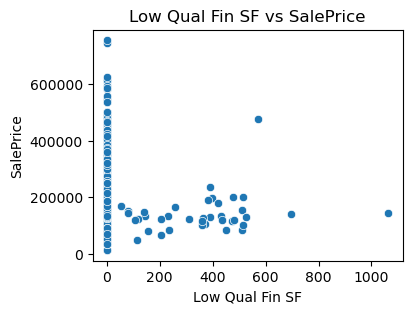

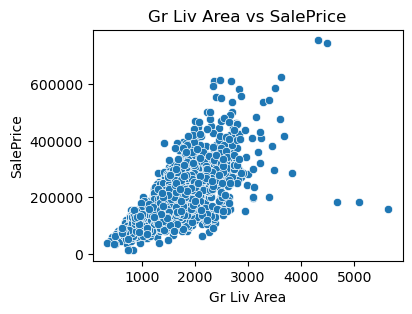

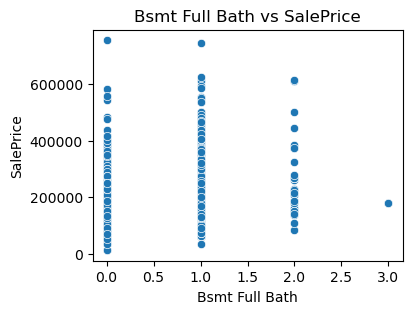

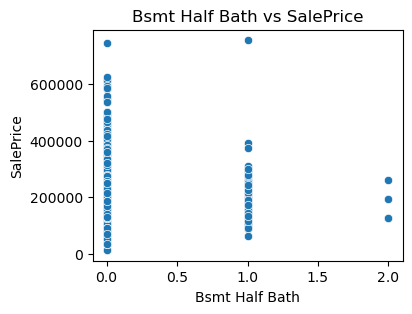

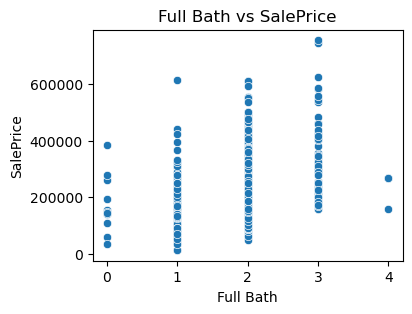

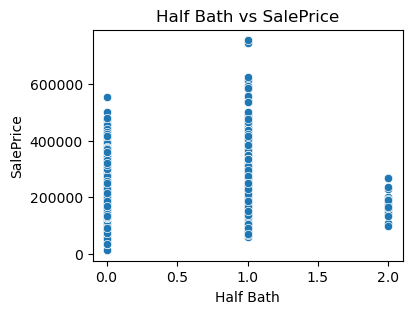

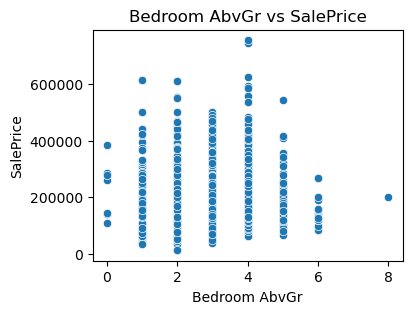

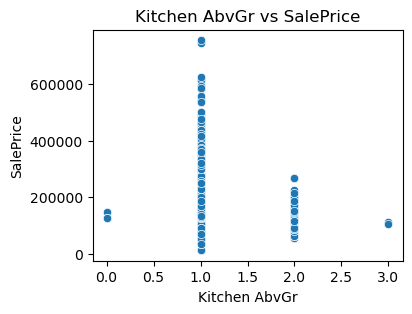

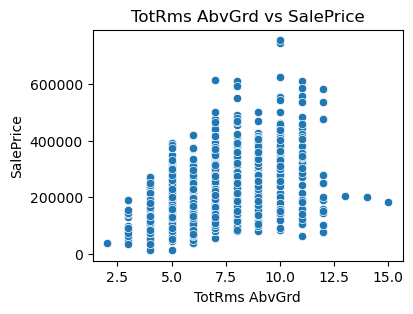

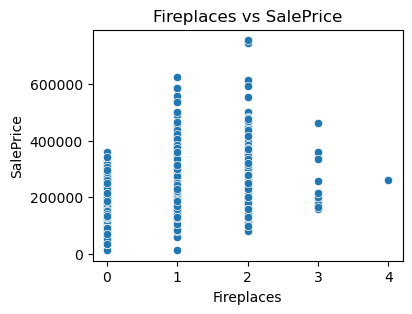

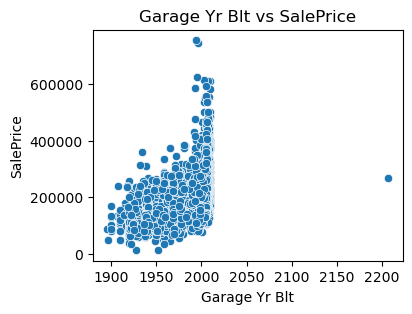

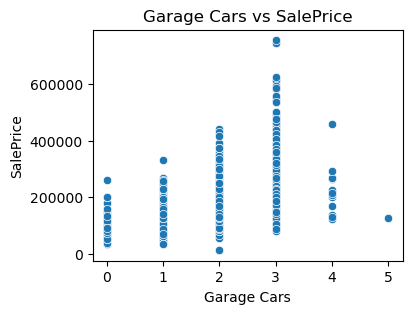

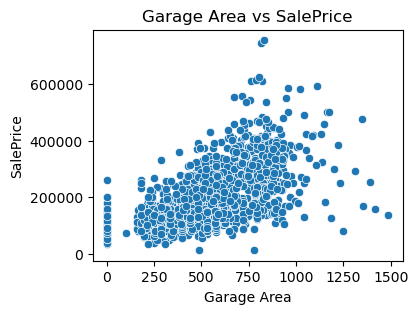

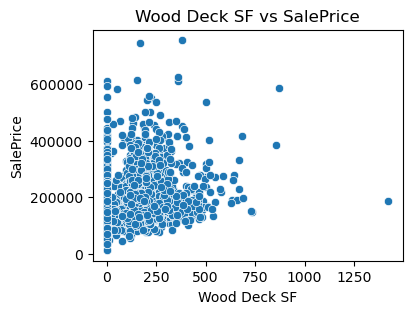

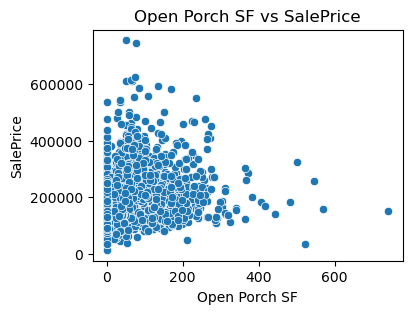

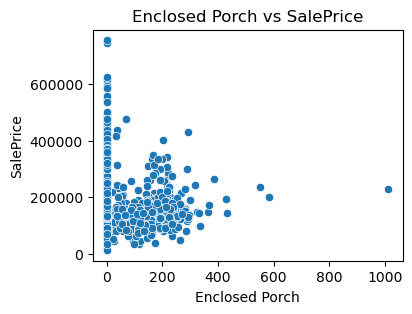

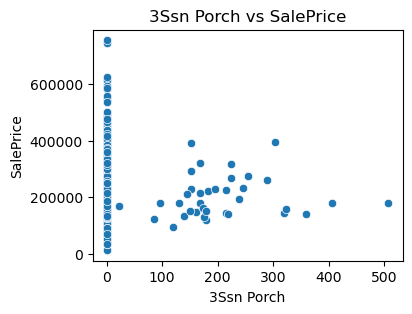

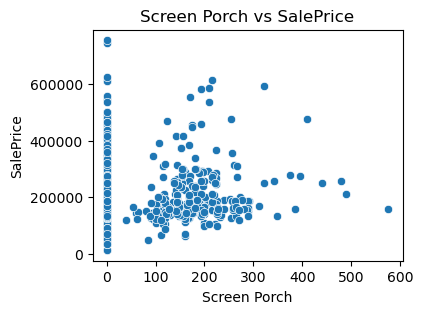

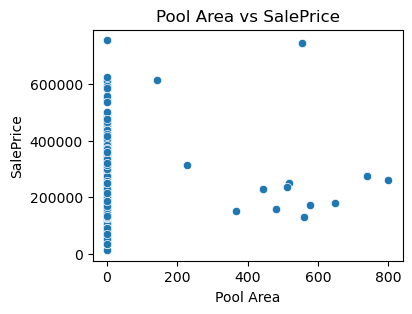

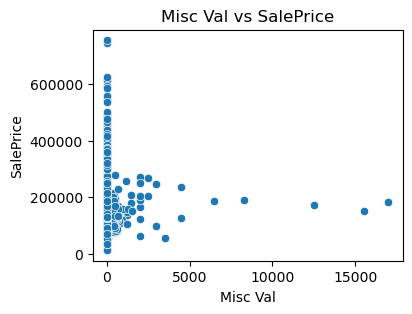

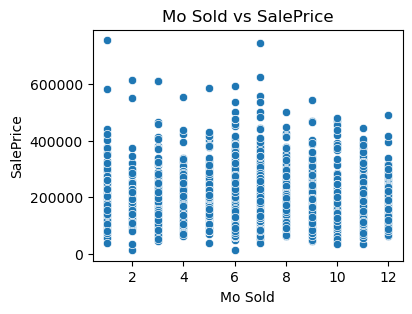

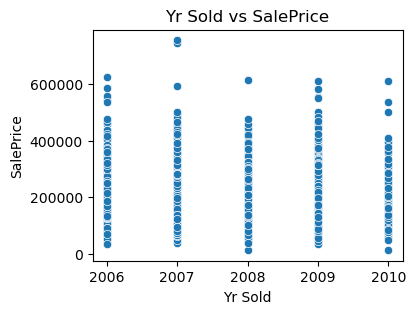

In [9]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
print(numerical_cols[0:5])

for cols in numerical_cols:
    if cols != 'SalePrice':
        plt.figure(figsize=(4,3))
        sns.scatterplot(x=cols, y = 'SalePrice', data=df)
        plt.title(f'{cols} vs SalePrice')
        plt.show(block=True)
        

/Users/niranjanappaji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

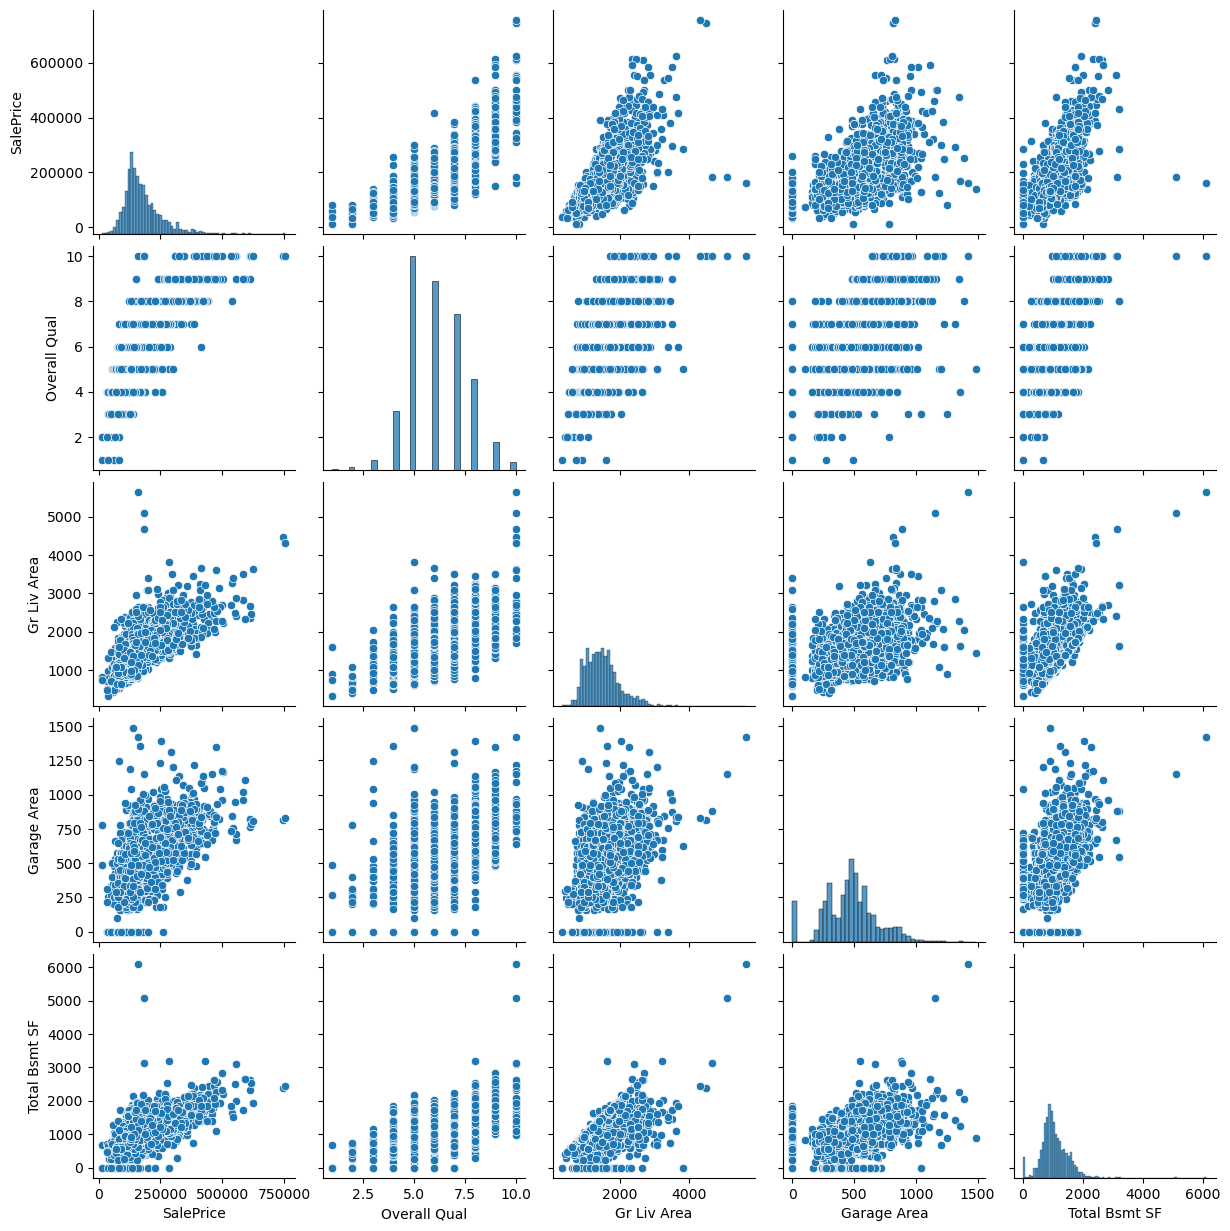

In [10]:
# Pair plot of highly correlated numerical features

plt.figure(figsize=(8, 6))
sns.pairplot(df, vars = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF'])
plt.show()


**Inference:** There is a linear relationship between SalePrice and GrLivArea, OverallQual, TotalBsmtSF, and GarageCars, making them important predictors.

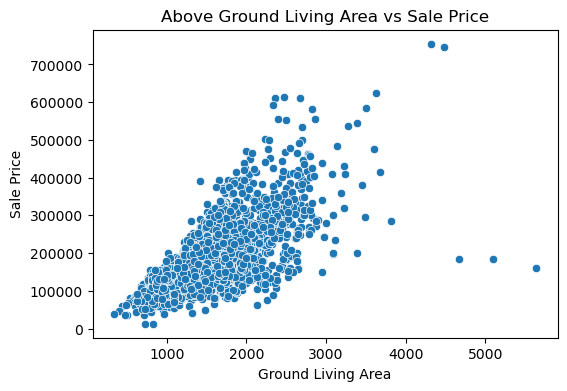

In [11]:
# Scatter plot for highly correlated or key variables

# Variable : Ground Living Area

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Gr Liv Area'], y = df['SalePrice'])
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.show()


#### Ground Living Area v/s Sale Price

- Scatter plot between Ground Living Area and Sales Price shows a **strong postitive** correlation
- As the Ground Living Area increases, the sale price also generally increases. This indicates generally larger size homes tends to be more expensive
- There are a few outliers with high Ground Living Area and yet low Sale price. However the relationship largely tends to be **linear**
- This feature is **highly predictive** for house price estimation and should be included in the model training. 

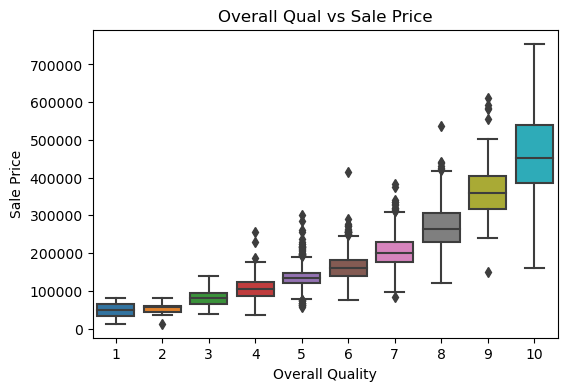

In [12]:
# Variable : Overall Quality

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Overall Qual'], y = df['SalePrice'])
plt.title('Overall Qual vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


**Inference** Sale Price increases significantly with Overall Quality improves.

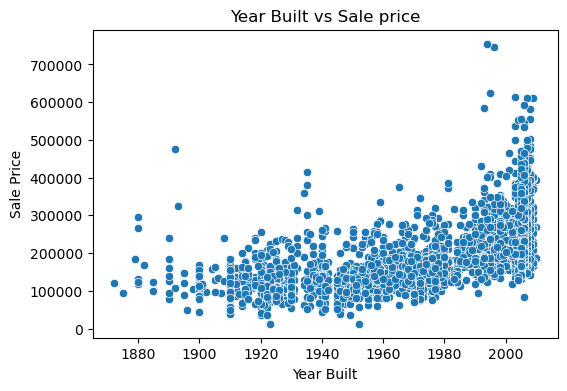

In [13]:
# Variable : Lot Area

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Year Built'], y=df['SalePrice'])
plt.title("Year Built vs Sale price")
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()


**Inference:** More recently built homes tend to have higher sale prices, indicating an increasing trend over time.

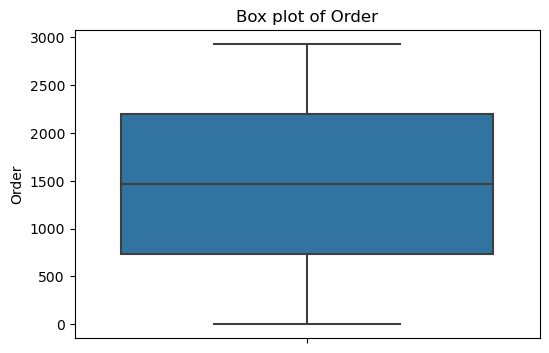

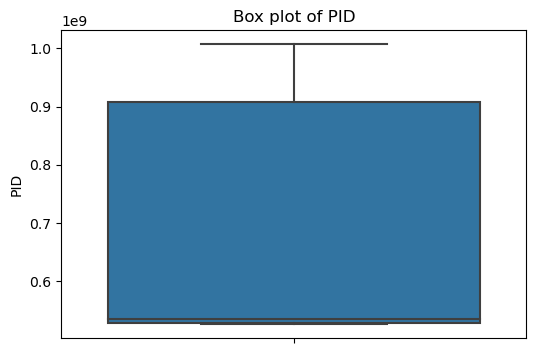

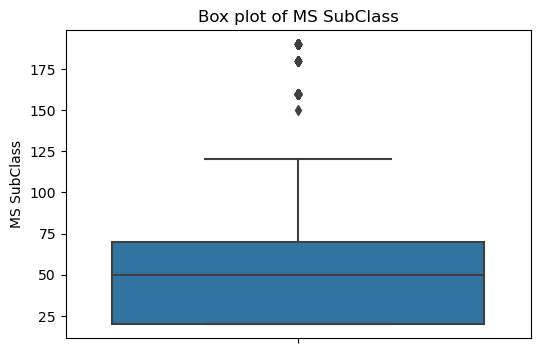

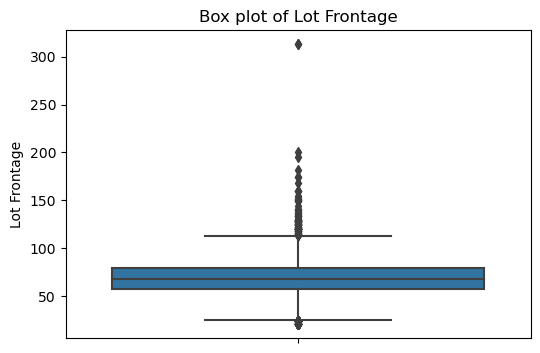

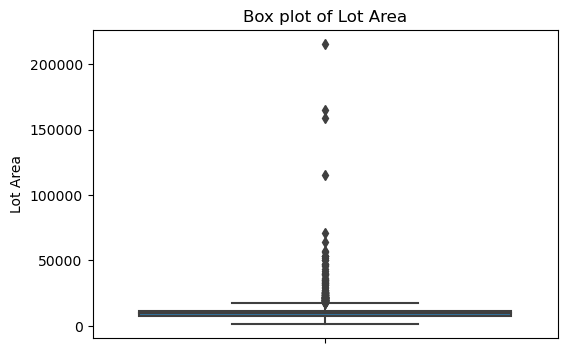

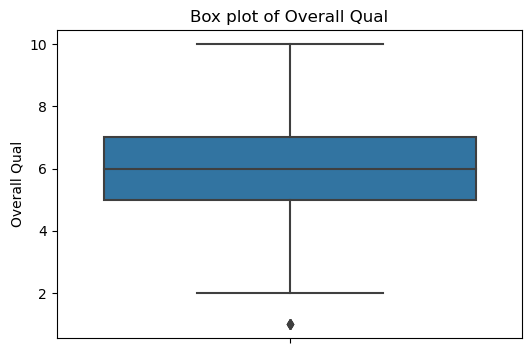

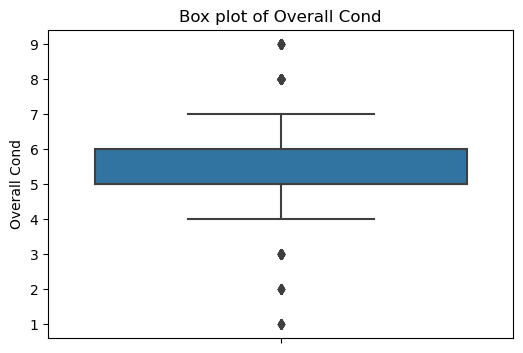

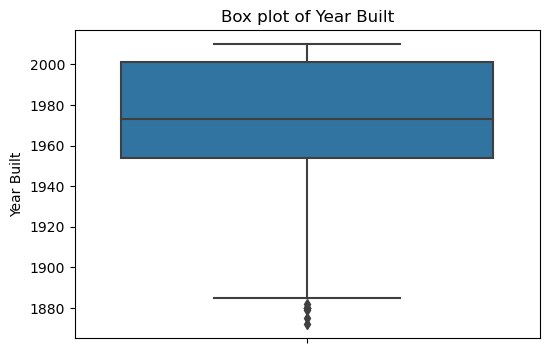

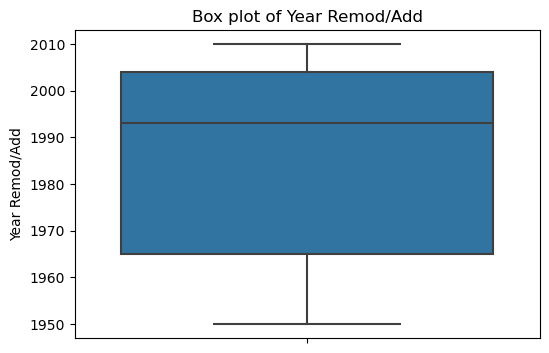

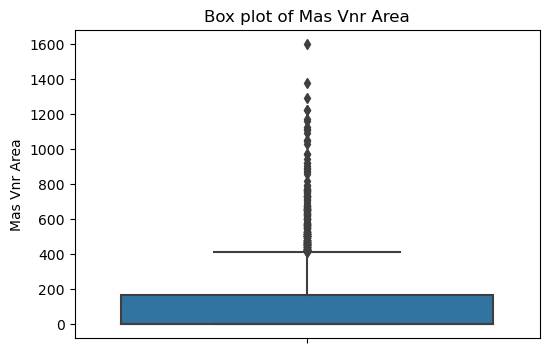

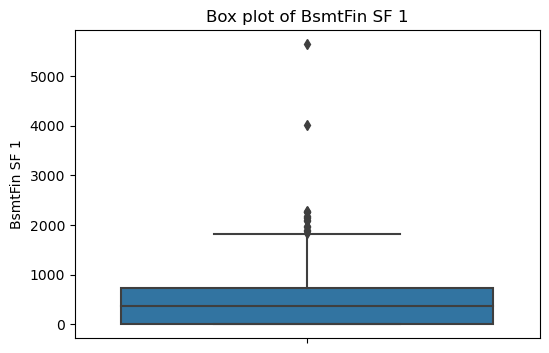

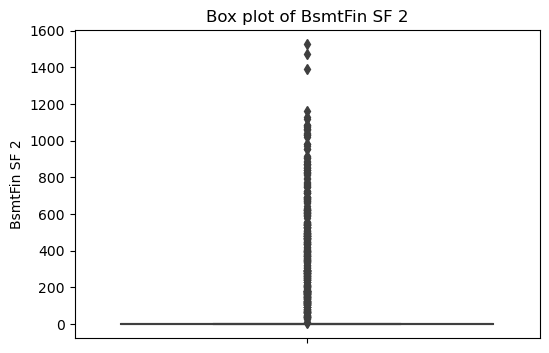

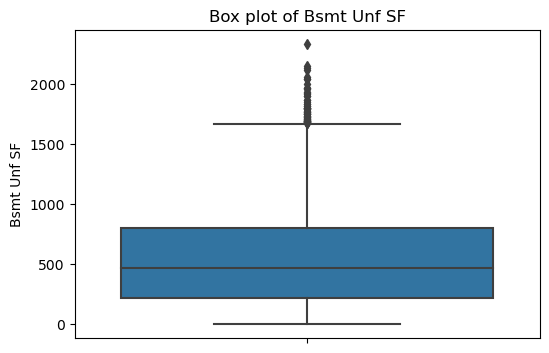

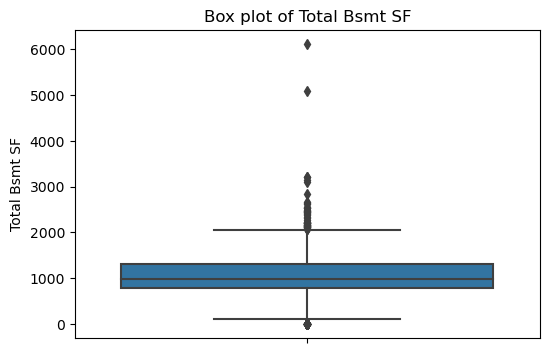

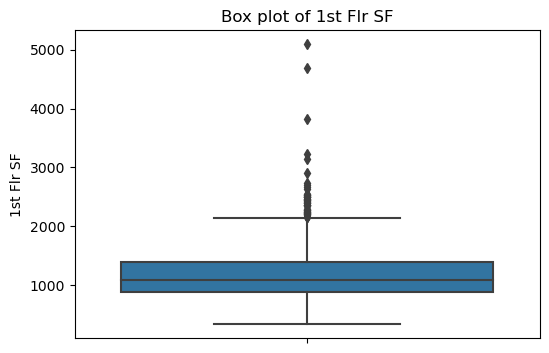

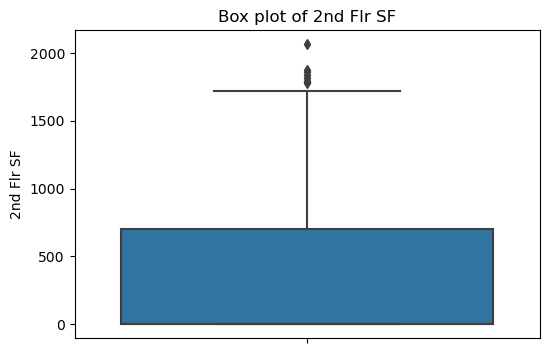

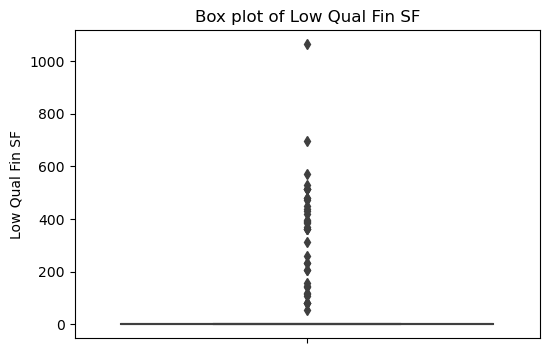

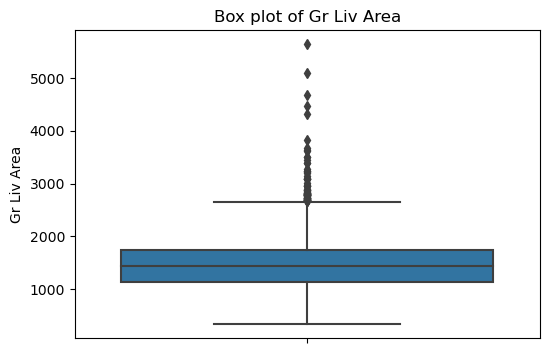

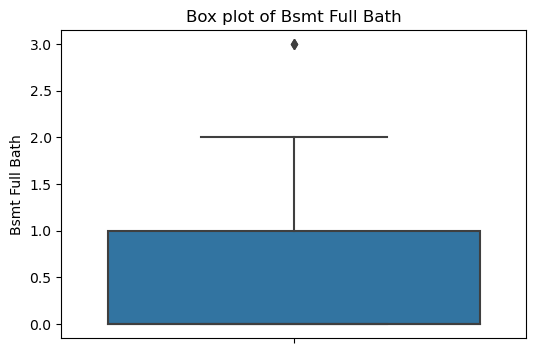

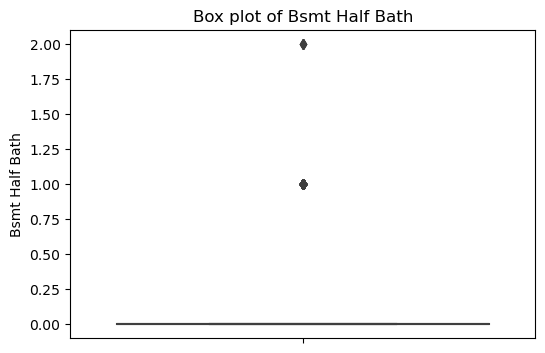

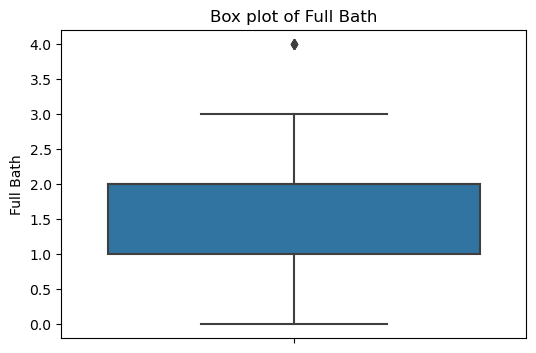

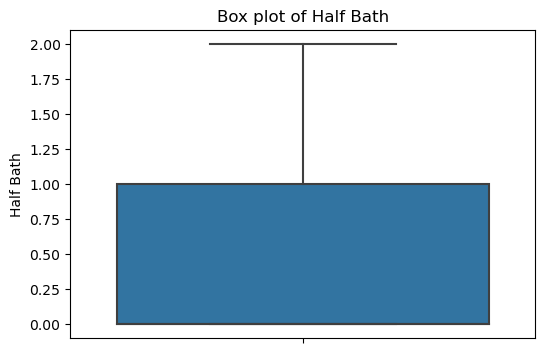

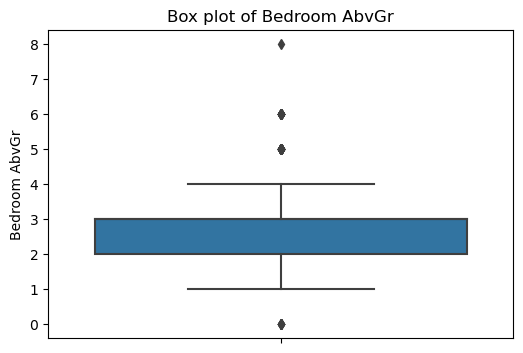

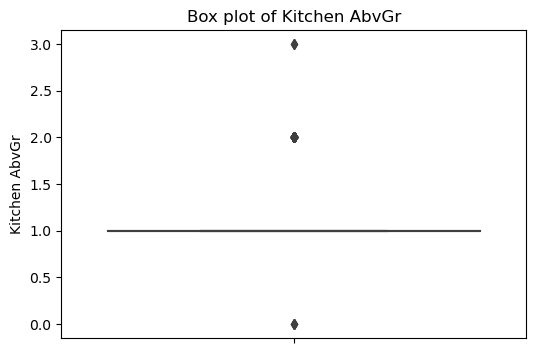

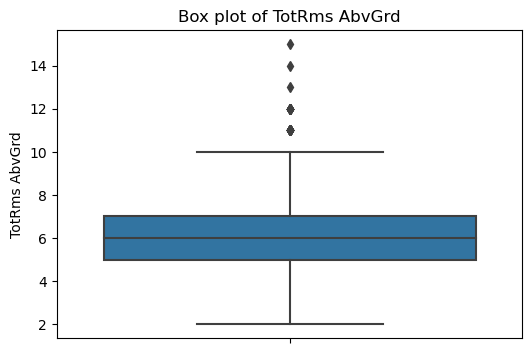

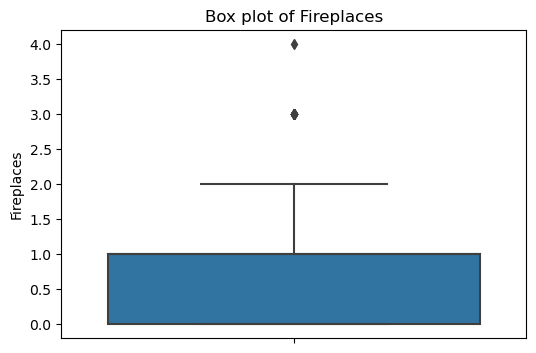

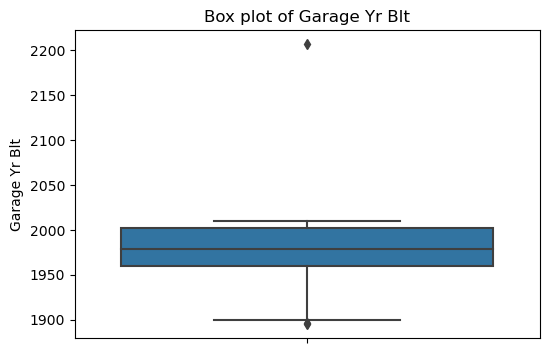

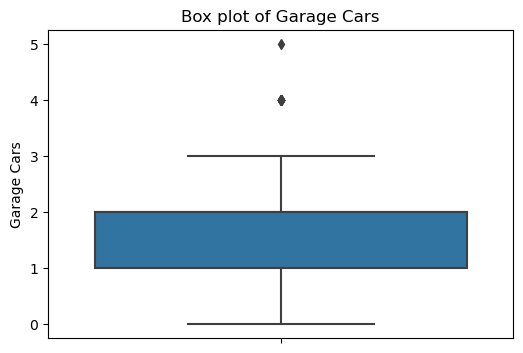

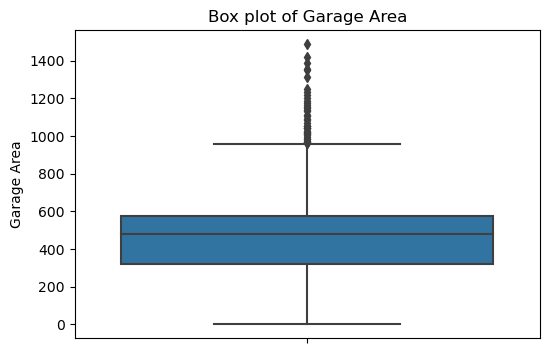

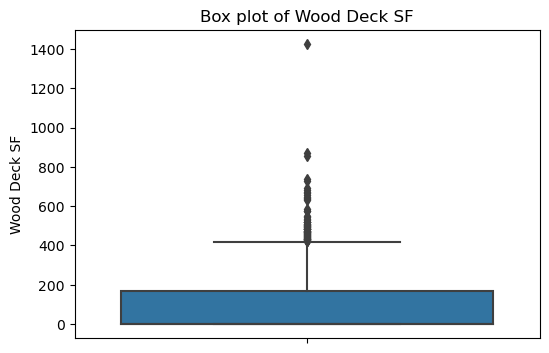

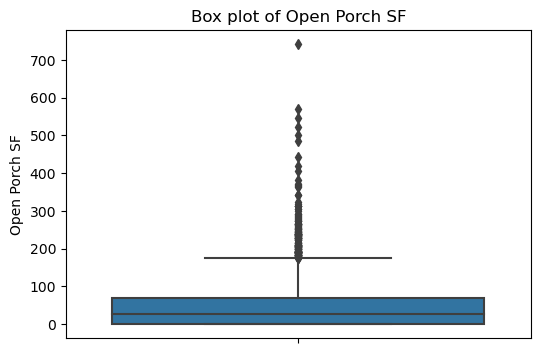

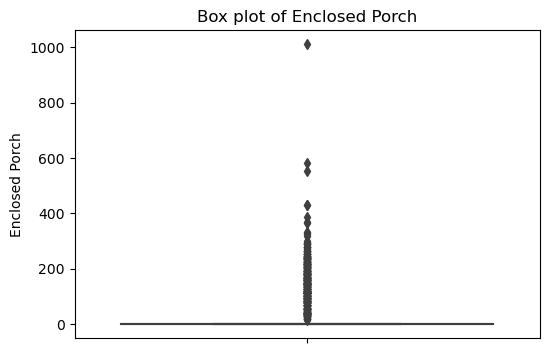

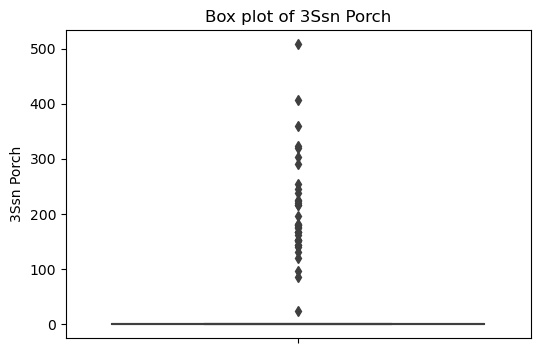

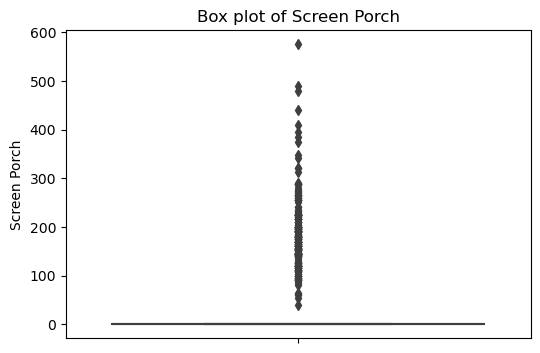

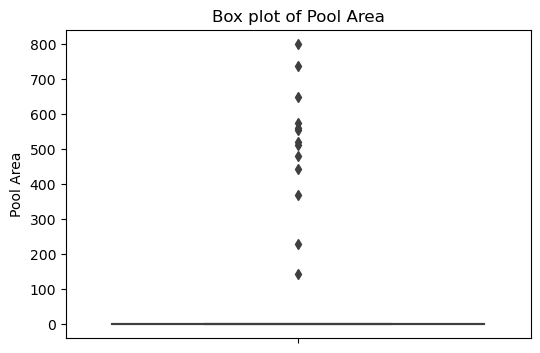

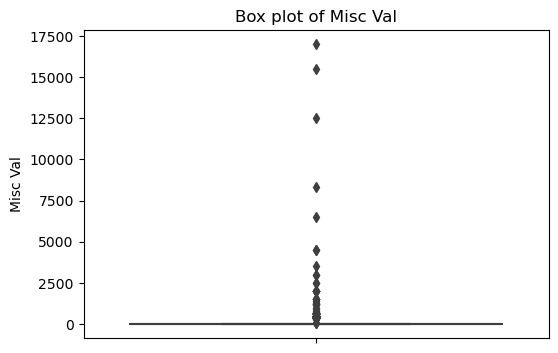

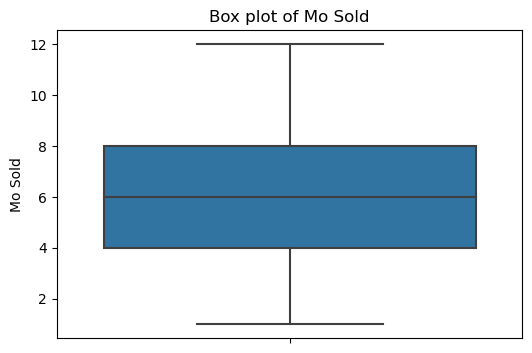

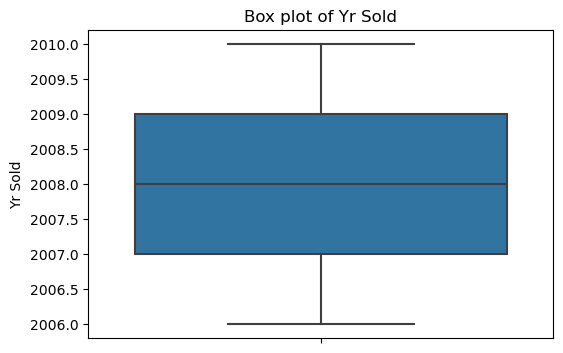

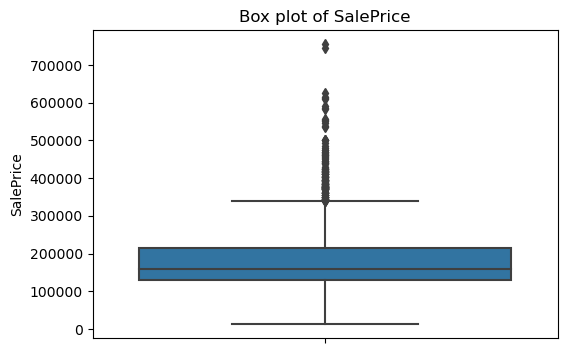

In [14]:
# Outlier Identification

numeric_cols = df.select_dtypes(include='number').columns.tolist()
for cols in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[cols], orient='v')
    plt.title(f'Box plot of {cols}')
    plt.show()

In [15]:
numeric_cols

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [16]:
outlier_cols = [ 'Lot Area', 'Total Bsmt SF', 'Garage Area']

### Step 4: Feature Engineering

- Handling missing values - Why handling missing values is important?
    - Missing values can introduce bias and reduce the accuracy of the model
    - Imputing missing values helps maintain dataset integrity and ensures that the model can make accurate predictions
- Encoding categorical features
- Creating new features

In [17]:
# Filling Numerical missing values with median and categorical with mode.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
            

In [18]:
# df['Street'].mode()[0]
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,189900


In [19]:
df.describe()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.019795,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,21.326422,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [20]:
df.isnull().sum().sort_values(ascending=False).head(5)


Order            0
Garage Finish    0
Garage Type      0
Fireplace Qu     0
Fireplaces       0
dtype: int64

In [21]:
#df[['PID', 'Order']].head(10)

df.drop(['PID', 'Order'], axis = 1, inplace =True)
df.head()


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,189900


In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [23]:
# Analyze cardinality of categorical features
for col in categorical_columns:
    print(f'{col} : {df[col].nunique()} unique values')
    

MS Zoning : 7 unique values
Street : 2 unique values
Alley : 2 unique values
Lot Shape : 4 unique values
Land Contour : 4 unique values
Utilities : 3 unique values
Lot Config : 5 unique values
Land Slope : 3 unique values
Neighborhood : 28 unique values
Condition 1 : 9 unique values
Condition 2 : 8 unique values
Bldg Type : 5 unique values
House Style : 8 unique values
Roof Style : 6 unique values
Roof Matl : 8 unique values
Exterior 1st : 16 unique values
Exterior 2nd : 17 unique values
Mas Vnr Type : 4 unique values
Exter Qual : 4 unique values
Exter Cond : 5 unique values
Foundation : 6 unique values
Bsmt Qual : 5 unique values
Bsmt Cond : 5 unique values
Bsmt Exposure : 4 unique values
BsmtFin Type 1 : 6 unique values
BsmtFin Type 2 : 6 unique values
Heating : 6 unique values
Heating QC : 5 unique values
Central Air : 2 unique values
Electrical : 5 unique values
Kitchen Qual : 5 unique values
Functional : 8 unique values
Fireplace Qu : 5 unique values
Garage Type : 6 unique values


In [24]:
# Apply target encoding to 'Neighborhood' (high cardinality example)

mean_sale_price = df.groupby('Neighborhood')['SalePrice'].mean().to_dict()
# print(mean_sale_price)
df['Neighborhood_encoded'] = df['Neighborhood'].map(mean_sale_price)
# df.drop('Neighborhood', axis = 1, inplace=True)


In [25]:
#df['Neighborhood_encoded'].head()

In [26]:
# Apply one-hot encoding to low cardinality categorical features

low_cardinal_cols = [col for col in categorical_columns if col != 'Neighborhood' and df[col].nunique() < 10]
low_cardinal_cols[0:5]
df = pd.get_dummies(df, columns = low_cardinal_cols, drop_first=True)


In [27]:
df.head()


,MS SubClass,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,...,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,NAmes,6,5,1960,1960,BrkFace,Plywood,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,11622,NAmes,5,6,1961,1961,VinylSd,VinylSd,...,False,False,False,True,False,False,False,False,True,False
2,20,81.0,14267,NAmes,6,6,1958,1958,Wd Sdng,Wd Sdng,...,False,True,False,False,False,False,False,False,True,False
3,20,93.0,11160,NAmes,7,5,1968,1968,BrkFace,BrkFace,...,False,False,False,True,False,False,False,False,True,False
4,60,74.0,13830,Gilbert,5,5,1997,1998,VinylSd,VinylSd,...,False,False,False,True,False,False,False,False,True,False


In [28]:
categorical_columns.difference(low_cardinal_cols)


Index(['Exterior 1st', 'Exterior 2nd', 'Neighborhood', 'Sale Type'], dtype='object')

In [29]:
# Drop original categorical columns

df.drop(categorical_columns.difference(low_cardinal_cols), axis = 1, inplace=True)
df.head()


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,True,False,False,False,False,False,False,True,False
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False


### Step 5 - Identify need for Feature scaling

In [30]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
for cols in numeric_cols:
    print(f'{cols}: min={df[cols].min()}, max={df[cols].max()}')
    

MS SubClass: min=20, max=190
Lot Frontage: min=21.0, max=313.0
Lot Area: min=1300, max=215245
Overall Qual: min=1, max=10
Overall Cond: min=1, max=9
Year Built: min=1872, max=2010
Year Remod/Add: min=1950, max=2010
Mas Vnr Area: min=0.0, max=1600.0
BsmtFin SF 1: min=0.0, max=5644.0
BsmtFin SF 2: min=0.0, max=1526.0
Bsmt Unf SF: min=0.0, max=2336.0
Total Bsmt SF: min=0.0, max=6110.0
1st Flr SF: min=334, max=5095
2nd Flr SF: min=0, max=2065
Low Qual Fin SF: min=0, max=1064
Gr Liv Area: min=334, max=5642
Bsmt Full Bath: min=0.0, max=3.0
Bsmt Half Bath: min=0.0, max=2.0
Full Bath: min=0, max=4
Half Bath: min=0, max=2
Bedroom AbvGr: min=0, max=8
Kitchen AbvGr: min=0, max=3
TotRms AbvGrd: min=2, max=15
Fireplaces: min=0, max=4
Garage Yr Blt: min=1895.0, max=2207.0
Garage Cars: min=0.0, max=5.0
Garage Area: min=0.0, max=1488.0
Wood Deck SF: min=0, max=1424
Open Porch SF: min=0, max=742
Enclosed Porch: min=0, max=1012
3Ssn Porch: min=0, max=508
Screen Porch: min=0, max=576
Pool Area: min=0, ma

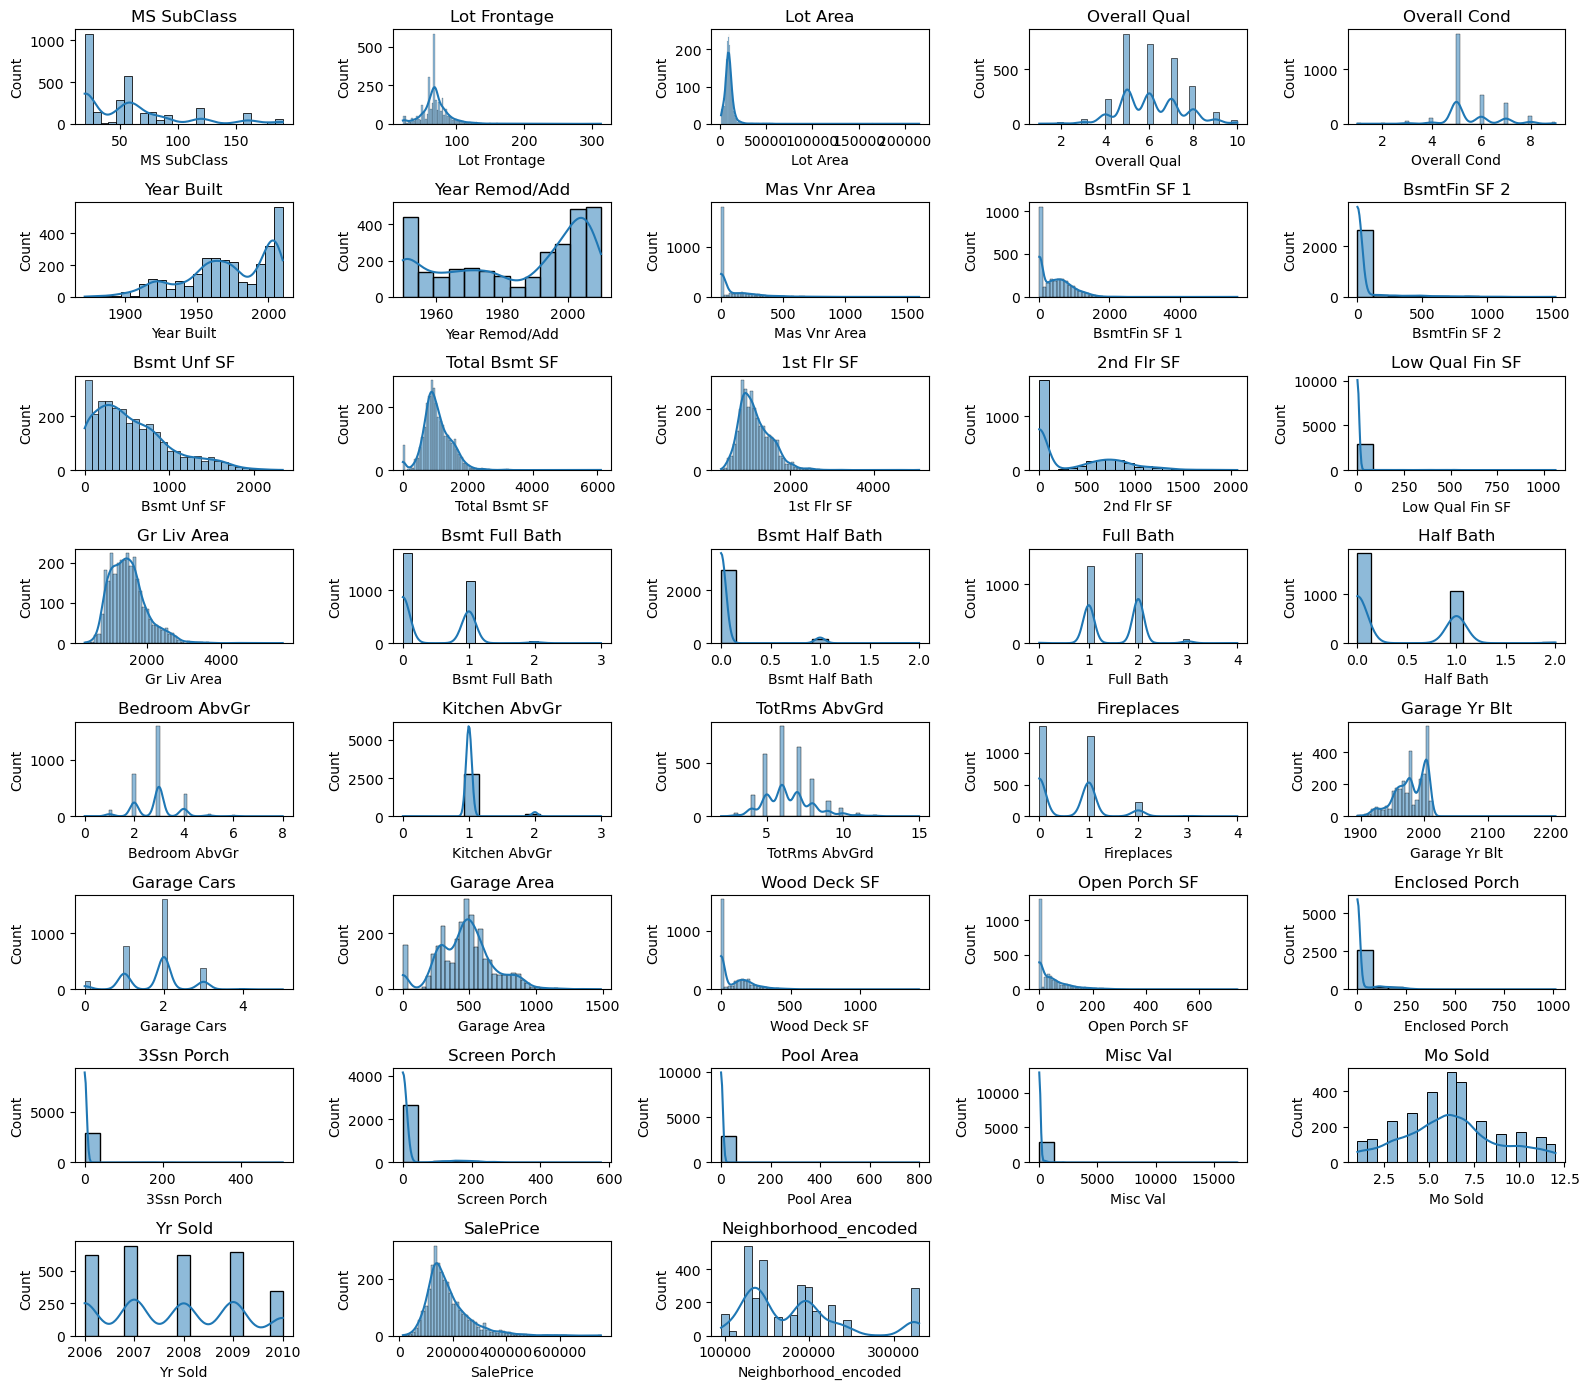

In [31]:
plt.figure(figsize=(16, 14))
for i, cols in enumerate(numeric_cols):
    plt.subplot(8, len(numeric_cols) // 7 , i+ 1)
    sns.histplot(df[cols], kde = True)
    plt.title(cols)
plt.tight_layout()
plt.show()


**Insight:** Significant differences in feature ranges indicate the need for scaling.

**Justification for StandardScaler:**
- The histplots show that some features have distributions that are approximately normal, but with different means and standard deviations.
- The min-max values show that the features have widely varying ranges, indicating that some features could dominate others in distance-based calculations.
- StandardScaler is suitable when features have approximately normal distributions and you want to center the data around zero with unit variance.


In [32]:
# Apply RobustScaler to outlier features, StandardScaler to others
for cols in numeric_cols:
    if cols in outlier_cols:
        scaler = RobustScaler()
    else:
        scaler = StandardScaler()
    df[[cols]] = scaler.fit_transform(df[[cols]])

# scaler = StandardScaler()    
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [33]:
for cols in numeric_cols:
    print(f'{cols} (scaled): min={df[cols].min():.2f}, max={df[cols].max():.2f}, mean={df[cols].mean():.2f}, StdDev={df[cols].std():.2f}')

MS SubClass (scaled): min=-0.88, max=3.11, mean=-0.00, StdDev=1.00
Lot Frontage (scaled): min=-2.25, max=11.44, mean=0.00, StdDev=1.00
Lot Area (scaled): min=-1.98, max=50.01, mean=0.17, StdDev=1.91
Overall Qual (scaled): min=-3.61, max=2.77, mean=-0.00, StdDev=1.00
Overall Cond (scaled): min=-4.11, max=3.09, mean=0.00, StdDev=1.00
Year Built (scaled): min=-3.29, max=1.28, mean=-0.00, StdDev=1.00
Year Remod/Add (scaled): min=-1.64, max=1.23, mean=-0.00, StdDev=1.00
Mas Vnr Area (scaled): min=-0.57, max=8.39, mean=0.00, StdDev=1.00
BsmtFin SF 1 (scaled): min=-0.97, max=11.42, mean=-0.00, StdDev=1.00
BsmtFin SF 2 (scaled): min=-0.29, max=8.73, mean=-0.00, StdDev=1.00
Bsmt Unf SF (scaled): min=-1.27, max=4.04, mean=0.00, StdDev=1.00
Total Bsmt SF (scaled): min=-1.95, max=10.07, mean=0.12, StdDev=0.87
1st Flr SF (scaled): min=-2.11, max=10.04, mean=0.00, StdDev=1.00
2nd Flr SF (scaled): min=-0.78, max=4.04, mean=0.00, StdDev=1.00
Low Qual Fin SF (scaled): min=-0.10, max=22.88, mean=0.00, S

**Insight:** Standard Scaling brings features to a similar range (mean=0, std=1).

### Step 6: Feature Selection

In [34]:
correlation_with_saleprice = df.corr()['SalePrice'].abs().sort_values(ascending=False)
selected_features = correlation_with_saleprice[correlation_with_saleprice > 0.5].index.tolist()
df_selected = df[selected_features].copy()
df_selected.head()


,SalePrice,Overall Qual,Neighborhood_encoded,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Exter Qual_TA,Year Built,Full Bath,Year Remod/Add,Kitchen Qual_TA,Foundation_PConc,Garage Finish_Unf,Garage Yr Blt,Mas Vnr Area,Bsmt Qual_TA
0,0.428229,-0.067254,-0.590296,0.309265,0.306589,0.187500,0.176991,1.267003,True,-0.375537,-1.024793,-1.163488,True,False,False,-0.732384,0.061046,True
1,-0.948957,-0.776079,-0.590296,-1.194427,-1.008648,0.976562,-0.212389,-0.672643,True,-0.342468,-1.024793,-1.115542,True,False,True,-0.692098,-0.566039,True
2,-0.110125,-0.067254,-0.590296,-0.337718,-1.008648,-0.656250,0.666667,0.432445,True,-0.441674,-1.024793,-1.259380,False,False,True,-0.812957,0.038650,True
3,0.791305,0.641571,-0.590296,1.207523,0.306589,0.164062,2.202557,2.425687,False,-0.110988,0.784028,-0.779919,False,False,False,-0.410094,-0.566039,True
4,0.113980,-0.776079,0.162883,0.255844,0.306589,0.007812,-0.121927,-0.590974,True,0.848000,0.784028,0.658466,True,True,False,0.758206,-0.566039,False


In [35]:
# Multicollinearity Check and Removal (VIF) 

X_vif = df_selected.select_dtypes(include='number').drop('SalePrice', axis = 1)
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [36]:
vif_data


,feature,VIF
0,Overall Qual,2.964903
1,Neighborhood_encoded,2.613131
2,Gr Liv Area,2.673174
3,Garage Cars,5.604985
4,Garage Area,5.343880
5,Total Bsmt SF,3.123408
6,1st Flr SF,3.292953
7,Year Built,3.619917
8,Full Bath,2.173169
9,Year Remod/Add,1.981580


In [37]:
high_vif_features = vif_data[vif_data['VIF'] > 5]['feature'].tolist()
high_vif_features

df_selected.drop(high_vif_features, axis = 1, inplace=True)

df_selected.head()

,SalePrice,Overall Qual,Neighborhood_encoded,Gr Liv Area,Total Bsmt SF,1st Flr SF,Exter Qual_TA,Year Built,Full Bath,Year Remod/Add,Kitchen Qual_TA,Foundation_PConc,Garage Finish_Unf,Garage Yr Blt,Mas Vnr Area,Bsmt Qual_TA
0,0.428229,-0.067254,-0.590296,0.309265,0.176991,1.267003,True,-0.375537,-1.024793,-1.163488,True,False,False,-0.732384,0.061046,True
1,-0.948957,-0.776079,-0.590296,-1.194427,-0.212389,-0.672643,True,-0.342468,-1.024793,-1.115542,True,False,True,-0.692098,-0.566039,True
2,-0.110125,-0.067254,-0.590296,-0.337718,0.666667,0.432445,True,-0.441674,-1.024793,-1.259380,False,False,True,-0.812957,0.038650,True
3,0.791305,0.641571,-0.590296,1.207523,2.202557,2.425687,False,-0.110988,0.784028,-0.779919,False,False,False,-0.410094,-0.566039,True
4,0.113980,-0.776079,0.162883,0.255844,-0.121927,-0.590974,True,0.848000,0.784028,0.658466,True,True,False,0.758206,-0.566039,False


### Step 7: Model Training

In [38]:
X = df_selected.drop('SalePrice', axis = 1)
y = df_selected['SalePrice']


In [39]:
# Split data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape

((2344, 15), (2344,))

In [40]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

### Step 8: Model Evaluation

In [41]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

In [42]:
# Calculate Evaluation Metrics

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [43]:
print(f'Mean Squared Error: {mse_linear}')
print(f'Root Mean squared Error: {rmse_linear}')
print(f'R Squared value: {r2_linear}')

Mean Squared Error: 0.2040787150401537
Root Mean squared Error: 0.4517507222353426
R Squared value: 0.8376109364520616


In [44]:
# Train the same model on the training data and predict on training data.

y_pred_train_linear = linear_model.predict(X_train)
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
rmse_train_linear = np.sqrt(mse_train_linear)
r2_train_linear = r2_score(y_train, y_pred_train_linear)


In [45]:
print(f'Mean Squared Error (training): {mse_train_linear}')
print(f'Root Mean squared Error (training): {rmse_train_linear}')
print(f'R Squared value (training): {r2_train_linear}')


Mean Squared Error (training): 0.17490294485722266
Root Mean squared Error (training): 0.4182139940953945
R Squared value (training): 0.8123312770404172


### Step 9: Try Regularization for improvements

In [46]:
# Ridge Regression (L2)

ridge_model = Ridge()
ridge_params = {'alpha':[0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)
ridge_grid.fit(X_train, y_train)

y_pred_ridge = ridge_grid.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


In [47]:
print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression RMSE: {rmse_ridge}')
print(f'Ridge Regression R2_Score: {r2_ridge}')

Ridge Regression MSE: 0.20505138599880593
Ridge Regression RMSE: 0.4528259996939287
Ridge Regression R2_Score: 0.8368369648691618


In [48]:
# Lasso Regression (L1)

lasso_model = Lasso()
lasso_params = {'alpha':[0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

y_pred_lasso = lasso_grid.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [49]:
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression RMSE: {rmse_lasso}')
print(f'Lasso Regression R2_score: {r2_lasso}')

Lasso Regression MSE: 0.20626878441529695
Lasso Regression RMSE: 0.45416823360435166
Lasso Regression R2_score: 0.8358682592950414


**Inference** From training & test data set results, there doesnt seems to be a overfitting problem. Hence, with Regularization there is not much of an improvement

In [50]:
# Random Forest Regressor

rf_model = RandomForestRegressor()
rf_params = {'n_estimators':[50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

y_pred_rf = rf_grid.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest best parameters: {rf_grid.best_params_}')


Random Forest best parameters: {'max_depth': None, 'n_estimators': 100}


In [51]:
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')

Random Forest MSE: 0.1323586306329556
Random Forest RMSE: 0.3638112568804814
Random Forest R2 Score: 0.8946798833149056


In [54]:
# K-Fold Cross-Validation

kf = KFold(n_splits = 5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_grid.best_estimator_, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f'\nRandom Forest Cross-Validation scores (MSE): {-rf_scores}')
print(f'Random Forest Mean CV MSE: {-rf_scores.mean()}')


Random Forest Cross-Validation scores (MSE): [0.12964574 0.11144653 0.104047   0.14179046 0.1166429 ]
Random Forest Mean CV MSE: 0.120714528034125


**Inference:** Random Forest Regressor model is providing the best Mean Squared Error compared to all other models. 